# TAHAP MODELING - KAIZEN 2

Pada tahap pengklasifikasian ini menggunakan model CNN


### 1. Import Libarary

In [31]:
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

### 2. Import Dataset
ini adalah dataset hasil dari pengolahan sebelumnya dan disimpan dalam bentuk file pickle

In [32]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

In [33]:
X = np.asarray(data_dict['sequences'])
y = np.asarray(data_dict['labels'])

### 3. Split dataset

In [34]:
y = to_categorical(y).astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52, 15, 1662), (23, 15, 1662), (52, 5), (23, 5))

### 4. Membuat Callback Tensorbroad

In [25]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [26]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling2D, Flatten, Dense, Activation,Dropout

### 5. Tahap Modeling Menggunakan CNN-LSTM


In [64]:
  model = Sequential()
  
  #Conv + ReLU 
  model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=(15,1662)))
  model.add(Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"))
  model.add(Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"))
  #Fully connected layers/ NN
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(5, activation='softmax'))

In [65]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [66]:
history = model.fit(X_train, y_train, 
                             epochs=250, 
                             callbacks=[tb_callback],
                             validation_data=( X_test,y_test))

Epoch 1/250
2/2 [==============================] - 3s 276ms/step - loss: 1.7059 - categorical_accuracy: 0.2115 - val_loss: 1.6214 - val_categorical_accuracy: 0.2609
Epoch 2/250
2/2 [==============================] - 0s 58ms/step - loss: 1.6547 - categorical_accuracy: 0.1538 - val_loss: 1.8741 - val_categorical_accuracy: 0.2609
Epoch 3/250
2/2 [==============================] - 0s 46ms/step - loss: 1.7741 - categorical_accuracy: 0.1731 - val_loss: 1.8323 - val_categorical_accuracy: 0.2609
Epoch 4/250
2/2 [==============================] - 0s 56ms/step - loss: 1.7542 - categorical_accuracy: 0.1731 - val_loss: 1.7104 - val_categorical_accuracy: 0.1739
Epoch 5/250
2/2 [==============================] - 0s 63ms/step - loss: 1.6718 - categorical_accuracy: 0.2308 - val_loss: 1.6978 - val_categorical_accuracy: 0.0435
Epoch 6/250
2/2 [==============================] - 0s 56ms/step - loss: 1.6587 - categorical_accuracy: 0.2115 - val_loss: 1.6040 - val_categorical_accuracy: 0.3913
Epoch 7/250
2/2

In [67]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_33 (Conv1D)          (None, 15, 64)            531904    
                                                                 
 conv1d_34 (Conv1D)          (None, 15, 128)           41088     
                                                                 
 conv1d_35 (Conv1D)          (None, 15, 64)            41024     
                                                                 
 flatten_9 (Flatten)         (None, 960)               0         
                                                                 
 dense_20 (Dense)            (None, 32)                30752     
                                                                 
 dense_21 (Dense)            (None, 5)                 165       
                                                                 
Total params: 644,933
Trainable params: 644,933
Non-t

### 6. Evaluasi Model 

Plot pengecekan akurasi


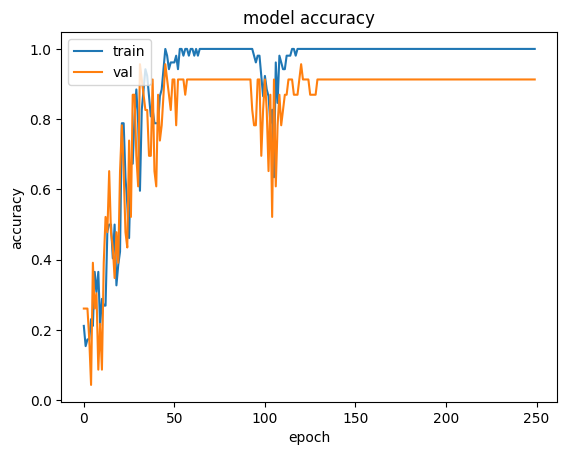

In [68]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Plot Pengecekan Loss


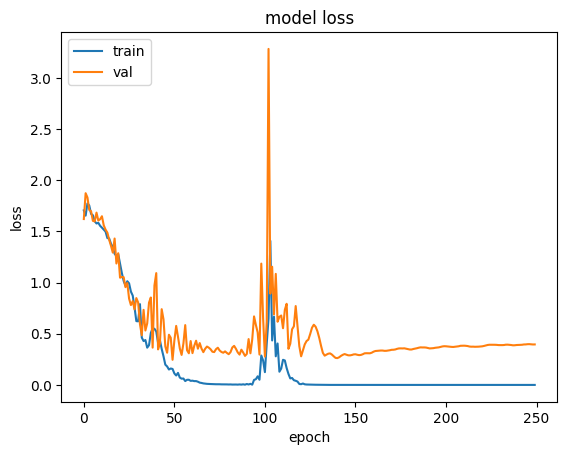

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 7. Menyimpan Model

In [70]:
model.save('model_CNN_new.h5')